In [19]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns   

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [20]:
df  = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [21]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [24]:
def apply_trf(transform):
    
    X = df[['Age', 'Fare']]
    y = df['Survived']

    # trf = ColumnTransformer(['log',FunctionTransformer(transform), ['Age', 'Fare']], remainder='passthrough')   
    
    trf = ColumnTransformer(
    transformers=[
        ('power', FunctionTransformer(transform), ['Age', 'Fare'])
    ],
    remainder='passthrough'
)

    X_trf = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Cross-Validation Score: ",np.mean(cross_val_score(clf, X_trf, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(12,5))

    plt.subplot(121)
    stats.probplot(X['Age'], dist="norm", plot=plt)
    plt.title('Age - Before Transformation')

    plt.subplot(122)
    stats.probplot(X_trf[:,0], dist="norm", plot=plt)
    plt.title('Age - Q-Q Plot After Transformation')

    plt.show()

Cross-Validation Score:  0.6589013732833957


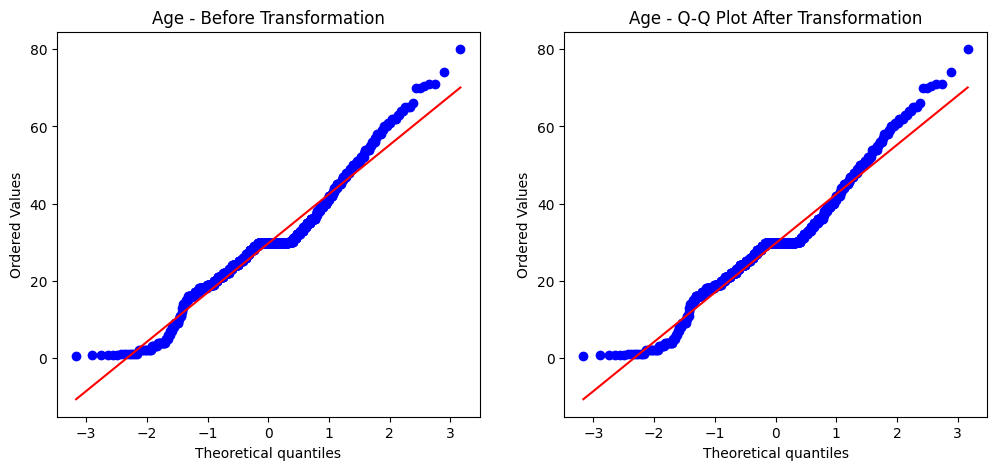

Cross-Validation Score:  0.6420099875156055


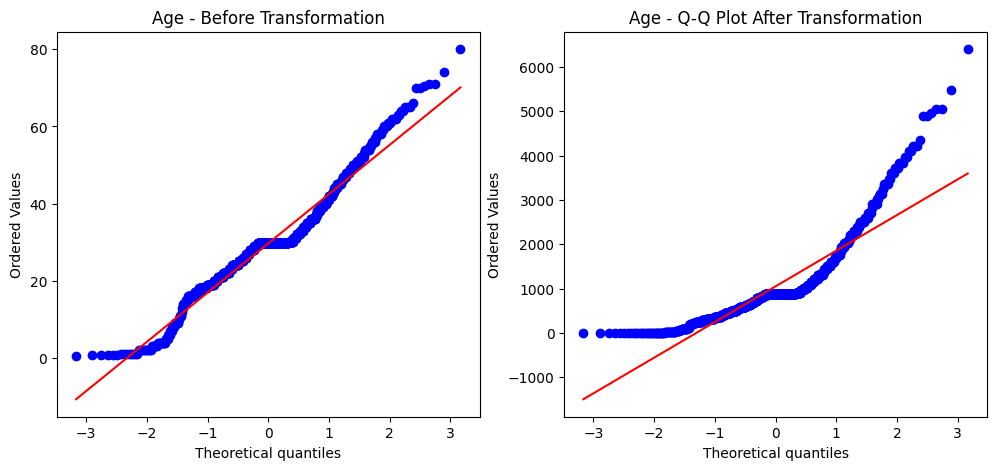

Cross-Validation Score:  0.6015605493133582


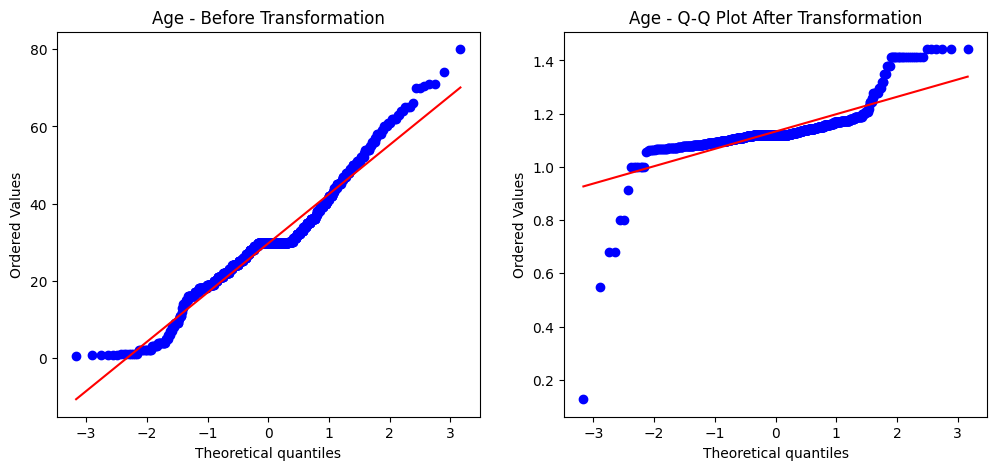

In [29]:
apply_trf(lambda x: x)
apply_trf(lambda x: x**2)
apply_trf(lambda x: x**(1/x))